In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import xarray as xr

import pims
from pims import ND2_Reader
import trackpy as tp

import pickle

In [7]:
with open(r"210624_Vimentin_m04_p06_A_TRAJECTORY.pkl", "rb") as input_file:
    tA = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_A001_TRAJECTORY.pkl", "rb") as input_file:
    tA1 = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_B_TRAJECTORY.pkl", "rb") as input_file:
    tB = pickle.load(input_file)
with open(r"210624_Vimentin_m04_p06_B001_TRAJECTORY.pkl", "rb") as input_file:
    tB1 = pickle.load(input_file)

In [9]:
imxA = tp.imsd(tA, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA = tp.imsd(tA, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxA1 = tp.imsd(tA1, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA1 = tp.imsd(tA1, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB = tp.imsd(tB, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB = tp.imsd(tB, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB1 = tp.imsd(tB1, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB1 = tp.imsd(tB1, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

In [42]:
isf = np.zeros((1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
q = 2*np.sqrt(2)
count=0

for i in range(1000):
    count=0
    temp = []
    for particle in imxA.keys():
        if not np.isnan(imxA[particle].values[i]):
            temp.append(np.exp(-1j*q*imxA[particle].values[i]))
            temp.append(np.exp(-1j*q*imyA[particle].values[i]))
            temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxA[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyA[particle].values[i]))
    for particle in imxA1.keys():
        if not np.isnan(imxA1[particle].values[i]):
            temp.append(np.exp(-1j*q*imxA1[particle].values[i]))
            temp.append(np.exp(-1j*q*imyA1[particle].values[i]))
            temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxA1[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyA1[particle].values[i]))
    for particle in imxB.keys():
        if not np.isnan(imxB[particle].values[i]):
            temp.append(np.exp(-1j*q*imxB[particle].values[i]))
            temp.append(np.exp(-1j*q*imyB[particle].values[i]))
            temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxB[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyB[particle].values[i]))
    for particle in imxB1.keys():
        if not np.isnan(imxB1[particle].values[i]):
            temp.append(np.exp(-1j*q*imxB1[particle].values[i]))
            temp.append(np.exp(-1j*q*imyB1[particle].values[i]))
            temp.append(np.exp(-1j*q*np.sqrt(1./2)*imxB1[particle].values[i])*np.exp(-1j*q*np.sqrt(1./2)*imyB1[particle].values[i]))
    isf[i] = np.mean(temp)
    isf_std[i] = np.std(temp)
    isf_stderr[i] = np.std(temp)/np.sqrt(len(temp)/3)
    #isf[i] = isf[i]/count

<IPython.core.display.Javascript object>


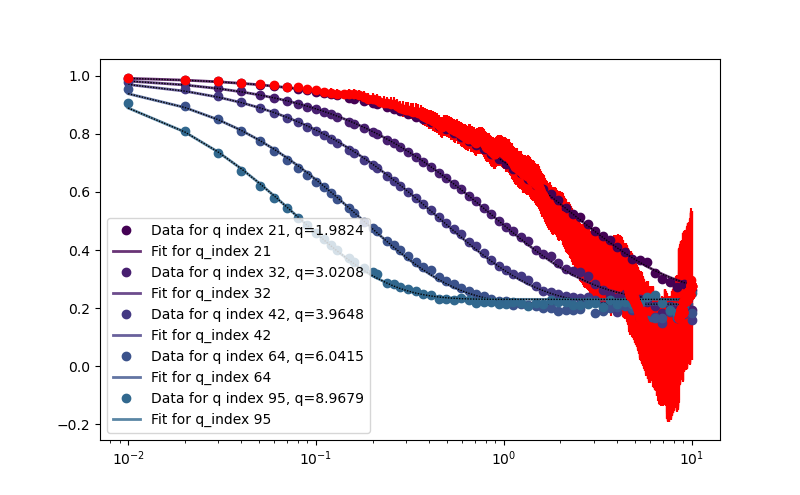

C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

In [43]:
fit_saved_dir = "C:/Users/rmcgorty/Dropbox/ManuscriptsInProgress/DDM of cytoskeleton - JoVE/Data/"
fit04_06_A = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_A.nc")
fit04_06_A1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_A1.nc")
fit04_06_B = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_B.nc")
fit04_06_B1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit04_06_B1.nc")

cmap = plt.get_cmap("viridis") 

fig_width = 8
markersize = 6 #was 1
fig, ax = plt.subplots(nrows=1, figsize=(fig_width,fig_width/1.618))
data = 0.25 * (fit04_06_A.isf_data + fit04_06_A1.isf_data + fit04_06_B.isf_data + fit04_06_B1.isf_data)
theory = 0.25 * (fit04_06_A.theory + fit04_06_A1.theory + fit04_06_B.theory + fit04_06_B1.theory)
times = fit04_06_A.lagtime
q = fit04_06_A.q    
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

q_index_to_plot = np.arange(12,100,7)
clrs = np.linspace(0,1,len(q_index_to_plot))
for i,qv in enumerate([21,32,42,64,95]):
    plt_color = cmap(clrs[i])
    qv = int(qv)

    ax.semilogx(times, data[:,qv], 'o', ms=markersize, color=plt_color, label="Data for q index %i, q=%.4f" % (qv, q[qv]))
    ax.semilogx(times, theory[:,qv], '-', color=plt_color, lw=2, alpha=0.8, label="Fit for q_index %i" % qv)
    ax.semilogx(times, theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)

plt.legend()

plt.semilogx(imxA.index, isf, 'ro')
plt.errorbar(imxA.index, isf, yerr=isf_stderr, fmt='none', color='r')